In [1]:
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
#sys.path.insert(0, '/Users/coreywalker/Desktop/NOAA/SCANAnalysis/SCAN-scripts/')#for my Macbook 
sys.path.insert(0, '/rhome/cwalker/Desktop/repositories/SCANAnalysis/SCAN-scripts/')#for my Linux Machine

In [2]:
from class_driver import Driver
from datasets import SCAN_READ #daily soil moisture data for all scan sites
SCAN_READ

,Date,station,SMN-2.0in,SMN-4.0in,SMN-8.0in,SMN-20.0in,SMN-40.0in,SMS-2.0in,SMS-4.0in,SMS-8.0in,...,STV-2.0in,STV-4.0in,STV-8.0in,STV-20.0in,STV-40.0in,STX-2.0in,STX-4.0in,STX-8.0in,STX-20.0in,STX-40.0in
0,4/24/02,2057:AL:SCAN,14.2,11.9,15.9,NaN,34.9,14.7,12.7,16.6,...,68.660,68.150,65.705,63.988,60.980,76.10,73.58,67.64,64.22,60.98
1,4/25/02,2057:AL:SCAN,13.5,11.6,15.4,NaN,34.8,14.5,11.8,16.0,...,66.552,67.168,66.102,64.302,61.032,70.88,70.16,67.46,64.40,61.16
2,4/26/02,2057:AL:SCAN,13.1,11.3,15.3,33.7,34.6,13.5,11.6,15.4,...,58.370,59.870,62.142,63.575,61.160,60.26,62.78,65.30,64.22,61.16
3,4/27/02,2057:AL:SCAN,13.1,11.4,15.0,NaN,34.5,13.2,11.5,15.5,...,62.510,62.232,61.025,62.008,61.018,69.80,67.64,63.32,62.60,61.16
4,4/28/02,2057:AL:SCAN,13.3,11.3,14.4,NaN,34.4,13.5,11.5,15.0,...,68.180,67.408,64.198,62.308,60.740,73.22,71.24,66.20,62.78,60.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79218,10/12/19,2182:AL:SCAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79219,3/28/20,2182:AL:SCAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79220,5/31/20,2182:AL:SCAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79221,9/21/19,2176:AL:SCAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#instantiate a driver object with data
obj = Driver(SCAN_READ)

#calculate the soil moisture mean by month dataframe
obj.mean_soil_moisture_by_month()

#get the standard deviation by month dataframe
obj.standard_deviation_by_month()

#create a column for months in the stations dataframe
obj.get_month_from_dates()

#merge stdev, mean and stations dataframe together
obj.merge_station_stdev_mean()

#calculate the z_scores for each of the observations in the merged dataframe
obj.z_score()

#calculate the data quality based on z_score
obj.quality_z_score(std=3.5)

#clean the data and remove data that is outside the 3.5 standard deviation limit
obj.clean_data()

#resample the SMS data and return 1w and store in resample class
obj.soil_moisture_one_week_resample()

#append the soils to SMS dataframes
obj.create_1w_soil_columns()

#merge with ALEXI
obj.merge_1w_soil_resample_with_ALEXI()



Calculating Monthly Mean for 2057:AL:SCAN
Calculating Monthly Mean for 2078:AL:SCAN
Calculating Monthly Mean for 2177:AL:SCAN
Calculating Monthly Mean for 2113:AL:SCAN
Calculating Monthly Mean for 2174:AL:SCAN
Calculating Monthly Mean for 2055:AL:SCAN
Calculating Monthly Mean for 2173:AL:SCAN
Calculating Monthly Mean for 2180:AL:SCAN
Calculating Monthly Mean for 2114:AL:SCAN
Calculating Monthly Mean for 2178:AL:SCAN
Calculating Monthly Mean for 2181:AL:SCAN
Calculating Monthly Mean for 2182:AL:SCAN
Calculating Monthly Mean for 2176:AL:SCAN
Calculating Monthly Mean for 2056:AL:SCAN
Calculating Monthly Mean for 2179:AL:SCAN
Calculating Monthly Mean for 2115:AL:SCAN
Calculating Monthly Mean for 2175:AL:SCAN
Calculating Monthly Mean for 2053:AL:SCAN


Done!


Calculating Monthly Standard Deviation for 2057:AL:SCAN
Calculating Monthly Standard Deviation for 2078:AL:SCAN
Calculating Monthly Standard Deviation for 2177:AL:SCAN
Calculating Monthly Standard Deviation for 2113:AL:SCAN
Calculat

In [4]:
df = obj.merge1wALEXI #set the merged, clean data to the df object
df.set_index('Date', inplace=True)

In [5]:
df.columns

Index(['SMS-2.0in', 'SMS-4.0in', 'SMS-8.0in', 'SMS-20.0in', 'SMS-40.0in',
       'station', 'Soil Class Dictionary', 'Two Soil', 'Four Soil',
       'Eight Soil', 'Twenty Soil', 'Forty Soil', 'Two Soil Reclassified',
       'Four Soil Reclassified', 'Eight Soil Reclassified',
       'Twenty Soil Reclassified', 'Forty Soil Reclassified', 'ESI'],
      dtype='object')

In [6]:
smdf = df[['SMS-2.0in','SMS-4.0in', 'SMS-8.0in', 'SMS-20.0in', 'SMS-40.0in', 'station']] #soil moisture only
esidf = df[['ESI', 'station']] #esi data alone

In [7]:
esidf['week']=esidf.index.week #get the week for the esidf
smdf['week']=smdf.index.week

In [8]:
smdf

,SMS-2.0in,SMS-4.0in,SMS-8.0in,SMS-20.0in,SMS-40.0in,station,week
Date,,,,,,,
2002-04-30,13.657143,11.657143,15.300000,33.200000,34.800000,2057:AL:SCAN,18
2002-05-21,23.100000,22.400000,18.914286,33.842857,37.257143,2057:AL:SCAN,21
2002-05-28,19.471429,19.700000,17.642857,33.600000,36.042857,2057:AL:SCAN,22
2002-06-11,11.242857,11.385714,13.671429,29.371429,34.828571,2057:AL:SCAN,24
2002-06-18,15.771429,14.985714,11.842857,25.128571,34.057143,2057:AL:SCAN,25
...,...,...,...,...,...,...,...
2020-12-02,NaN,34.528571,32.000000,34.471429,32.014286,2053:AL:SCAN,49
2020-12-09,NaN,33.371429,32.571429,35.685714,33.657143,2053:AL:SCAN,50
2020-12-16,NaN,33.928571,33.557143,36.171429,35.371429,2053:AL:SCAN,51


In [9]:
weeks = [] #storage for week number
twoInMeans = [] #storage for 2in week mean across clean dataset
fourInMeans = [] #4in 
eightInMeans = [] #8in
twentyInMeans = [] #20in
fortyInMeans = [] #40in
twoInStdev = [] #storage for #2in week stdev across clean dataset
fourInStdev = [] #4in
eightInStdev = [] #8in
twentyInStdev = [] #20in
fortyInStdev = [] #40in
stations = [] #storage for station number

for station in smdf['station'].unique():
    stationFrame = smdf[smdf['station']==station]
    stationFrame['Week']=stationFrame.index.week
    for w in stationFrame['Week'].unique(): #collect the data from each stationframe week
        weekFrame = stationFrame[stationFrame['Week']==w]
        weekMean=weekFrame.mean()
        weekSTDEV = weekFrame.std()
        stations.append(station) 
        weeks.append(w)
        twoInMeans.append(weekMean['SMS-2.0in'])
        fourInMeans.append(weekMean['SMS-4.0in'])
        eightInMeans.append(weekMean['SMS-8.0in'])
        twentyInMeans.append(weekMean['SMS-20.0in'])
        fortyInMeans.append(weekMean['SMS-40.0in'])
        twoInStdev.append(weekSTDEV['SMS-2.0in'])
        fourInStdev.append(weekSTDEV['SMS-4.0in'])
        eightInStdev.append(weekSTDEV['SMS-8.0in'])
        twentyInStdev.append(weekSTDEV['SMS-20.0in'])
        fortyInStdev.append(weekSTDEV['SMS-40.0in'])
        
#build a week statistics dataframe from collected data
SMStatsFrame = pd.DataFrame()
SMStatsFrame['station'] = stations
SMStatsFrame['week']=weeks
SMStatsFrame['2inAllWeeksMean']=twoInMeans
SMStatsFrame['4inAllWeeksMean']=fourInMeans
SMStatsFrame['8inAllWeeksMean']=eightInMeans
SMStatsFrame['20inAllWeeksMean']=twentyInMeans
SMStatsFrame['40inAllWeeksMean']=fortyInMeans
SMStatsFrame['2inAllWeeksSTDev']=twoInStdev
SMStatsFrame['4inAllWeeksSTDev']=fourInStdev
SMStatsFrame['8inAllWeeksSTDev']=eightInStdev
SMStatsFrame['20inAllWeeksSTDev']=twentyInStdev
SMStatsFrame['40inAllWeeksSTDev']=fortyInStdev

In [10]:
df = pd.DataFrame(SMStatsFrame.mean())
df

,0
week,26.970588
2inAllWeeksMean,23.209252
4inAllWeeksMean,25.012986
8inAllWeeksMean,28.175167
20inAllWeeksMean,31.667916
40inAllWeeksMean,35.199572
2inAllWeeksSTDev,6.599692
4inAllWeeksSTDev,5.802235
8inAllWeeksSTDev,4.829636
20inAllWeeksSTDev,4.466825


In [11]:
df = df.transpose()

In [12]:
df

,week,2inAllWeeksMean,4inAllWeeksMean,8inAllWeeksMean,20inAllWeeksMean,40inAllWeeksMean,2inAllWeeksSTDev,4inAllWeeksSTDev,8inAllWeeksSTDev,20inAllWeeksSTDev,40inAllWeeksSTDev
0,26.970588,23.209252,25.012986,28.175167,31.667916,35.199572,6.599692,5.802235,4.829636,4.466825,5.998597


In [13]:
#merge the clean esidf with statsframe
smdf.reset_index(inplace=True)
smdfmerged = pd.merge(SMStatsFrame, smdf, on=['station', 'week'])

In [14]:
#calculate all anomalies
smdfmerged['2inANOM']=(smdfmerged['SMS-2.0in']-smdfmerged['2inAllWeeksMean'])/smdfmerged['2inAllWeeksSTDev']
smdfmerged['4inANOM']=(smdfmerged['SMS-4.0in']-smdfmerged['4inAllWeeksMean'])/smdfmerged['4inAllWeeksSTDev']
smdfmerged['8inANOM']=(smdfmerged['SMS-8.0in']-smdfmerged['8inAllWeeksMean'])/smdfmerged['8inAllWeeksSTDev']
smdfmerged['20inANOM']=(smdfmerged['SMS-20.0in']-smdfmerged['20inAllWeeksMean'])/smdfmerged['20inAllWeeksSTDev']
smdfmerged['40inANOM']=(smdfmerged['SMS-40.0in']-smdfmerged['40inAllWeeksMean'])/smdfmerged['40inAllWeeksSTDev']

In [15]:
smdfmerged.mean()

week                 2.677765e+01
2inAllWeeksMean      2.417192e+01
4inAllWeeksMean      2.582019e+01
8inAllWeeksMean      2.872720e+01
20inAllWeeksMean     3.237351e+01
40inAllWeeksMean     3.601429e+01
2inAllWeeksSTDev     6.567568e+00
4inAllWeeksSTDev     5.789074e+00
8inAllWeeksSTDev     5.001798e+00
20inAllWeeksSTDev    4.555112e+00
40inAllWeeksSTDev    5.902334e+00
SMS-2.0in            2.446012e+01
SMS-4.0in            2.572491e+01
SMS-8.0in            2.902539e+01
SMS-20.0in           3.238695e+01
SMS-40.0in           3.558458e+01
2inANOM              1.553608e-18
4inANOM             -5.889428e-17
8inANOM             -9.834774e-19
20inANOM             8.693916e-17
40inANOM             5.452871e-17
dtype: float64

In [16]:
#reset esi df
esidf.reset_index(inplace=True)

In [17]:
SMAnomalyFrame = smdfmerged[['Date','station', 'week', '2inANOM', '4inANOM', '8inANOM', '20inANOM', '40inANOM']] #reduce dataframe
SMAnomalyFrame

,Date,station,week,2inANOM,4inANOM,8inANOM,20inANOM,40inANOM
0,2002-04-30,2057:AL:SCAN,18,-1.839516,-2.608769,-2.434962,-2.084585,-1.598313
1,2003-04-30,2057:AL:SCAN,18,-0.049530,-0.846087,-1.574525,-2.111607,-0.285467
2,2004-04-29,2057:AL:SCAN,18,0.236358,-0.663291,-0.369915,1.420606,0.480933
3,2005-05-07,2057:AL:SCAN,18,0.478544,0.079088,0.297165,0.451660,0.511864
4,2006-05-07,2057:AL:SCAN,18,NaN,NaN,-0.727624,0.548169,1.085804
...,...,...,...,...,...,...,...,...
9669,2013-07-16,2053:AL:SCAN,29,0.849514,1.109252,0.466453,-1.219342,0.720741
9670,2014-07-16,2053:AL:SCAN,29,-0.525314,-0.764104,-0.464014,NaN,-0.089454
9671,2016-07-22,2053:AL:SCAN,29,0.031796,-0.975972,-0.592587,0.418481,-2.131554
9672,2017-07-23,2053:AL:SCAN,29,1.372291,0.536838,0.593335,1.034148,0.638955


In [18]:
finalFrame = pd.merge(esidf, SMAnomalyFrame, on=['Date','station'])

In [19]:
finalFrame

,Date,ESI,station,week_x,week_y,2inANOM,4inANOM,8inANOM,20inANOM,40inANOM
0,2002-04-30,-0.527,2057:AL:SCAN,18,18,-1.839516,-2.608769,-2.434962,-2.084585,-1.598313
1,2002-05-21,1.565,2057:AL:SCAN,21,21,-0.349508,-1.356723,-1.702116,-1.692849,-0.663807
2,2002-05-28,1.484,2057:AL:SCAN,22,22,-0.234778,-0.972001,-1.546049,-1.441618,-0.890192
3,2002-06-11,0.419,2057:AL:SCAN,24,24,-1.524178,-1.680948,-1.660611,-1.608081,-0.872815
4,2002-06-18,1.374,2057:AL:SCAN,25,25,-0.737961,-1.484239,-2.253738,-2.101628,-0.901292
...,...,...,...,...,...,...,...,...,...,...
9669,2020-12-02,1.522,2053:AL:SCAN,49,49,NaN,-0.038652,0.551961,0.416028,-1.223196
9670,2020-12-09,1.082,2053:AL:SCAN,50,50,NaN,-0.628406,0.522642,0.541675,-0.954042
9671,2020-12-16,0.068,2053:AL:SCAN,51,51,NaN,-0.564758,0.286017,0.215204,-0.923545
9672,2020-12-23,0.167,2053:AL:SCAN,52,52,NaN,-0.662174,0.122894,-0.009764,0.495781


In [20]:
finalFrame.set_index('Date', inplace=True)

In [21]:
finalFrame

,ESI,station,week_x,week_y,2inANOM,4inANOM,8inANOM,20inANOM,40inANOM
Date,,,,,,,,,
2002-04-30,-0.527,2057:AL:SCAN,18,18,-1.839516,-2.608769,-2.434962,-2.084585,-1.598313
2002-05-21,1.565,2057:AL:SCAN,21,21,-0.349508,-1.356723,-1.702116,-1.692849,-0.663807
2002-05-28,1.484,2057:AL:SCAN,22,22,-0.234778,-0.972001,-1.546049,-1.441618,-0.890192
2002-06-11,0.419,2057:AL:SCAN,24,24,-1.524178,-1.680948,-1.660611,-1.608081,-0.872815
2002-06-18,1.374,2057:AL:SCAN,25,25,-0.737961,-1.484239,-2.253738,-2.101628,-0.901292
...,...,...,...,...,...,...,...,...,...
2020-12-02,1.522,2053:AL:SCAN,49,49,NaN,-0.038652,0.551961,0.416028,-1.223196
2020-12-09,1.082,2053:AL:SCAN,50,50,NaN,-0.628406,0.522642,0.541675,-0.954042
2020-12-16,0.068,2053:AL:SCAN,51,51,NaN,-0.564758,0.286017,0.215204,-0.923545


In [22]:
finalFrame.to_csv('sm_anomaly_by_station_and_esi.csv')

In [23]:
finalFrame[(finalFrame['ESI']>=0)&(finalFrame['ESI']<=0.5)].mean()[['2inANOM','4inANOM', '8inANOM','20inANOM', '40inANOM']]

2inANOM     0.071598
4inANOM     0.074075
8inANOM     0.104921
20inANOM    0.089970
40inANOM    0.090351
dtype: float64

In [24]:
stddevList = np.arange(-3, 3.5, 0.5).tolist()
stddevList

[-3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]

In [25]:
count = 0
dic = {}

while count != len(stddevList)-1:
    lower = stddevList[count+1]
    upper = stddevList[count]
    count+=1
    dic[count] = finalFrame[(finalFrame['ESI']>=upper)&(finalFrame['ESI']<=lower)].mean()[['2inANOM','4inANOM', '8inANOM','20inANOM', '40inANOM']]

In [26]:
df = pd.DataFrame(pd.concat(dic, axis=1))

In [27]:
def get_signs(x):
    if x >= 0:
        return 0
    else:
        return 1 #means drought or negative score

In [28]:
finalFrame['ESI_sign'] = finalFrame['ESI'].apply(get_signs)
finalFrame['2inANOM_sign'] = finalFrame['2inANOM'].apply(get_signs)
finalFrame['4inANOM_sign'] = finalFrame['4inANOM'].apply(get_signs)
finalFrame['8inANOM_sign'] = finalFrame['8inANOM'].apply(get_signs)
finalFrame['20inANOM_sign'] = finalFrame['20inANOM'].apply(get_signs)
finalFrame['40inANOM_sign'] = finalFrame['40inANOM'].apply(get_signs)

In [29]:
finalFrame = finalFrame[['station', 'week_x', 'ESI', '2inANOM', '4inANOM', '8inANOM', '20inANOM', '40inANOM', 'ESI_sign', '2inANOM_sign', '4inANOM_sign', '8inANOM_sign', '20inANOM_sign', '40inANOM_sign']]

In [30]:
finalFrame

,station,week_x,ESI,2inANOM,4inANOM,8inANOM,20inANOM,40inANOM,ESI_sign,2inANOM_sign,4inANOM_sign,8inANOM_sign,20inANOM_sign,40inANOM_sign
Date,,,,,,,,,,,,,,
2002-04-30,2057:AL:SCAN,18,-0.527,-1.839516,-2.608769,-2.434962,-2.084585,-1.598313,1,1,1,1,1,1
2002-05-21,2057:AL:SCAN,21,1.565,-0.349508,-1.356723,-1.702116,-1.692849,-0.663807,0,1,1,1,1,1
2002-05-28,2057:AL:SCAN,22,1.484,-0.234778,-0.972001,-1.546049,-1.441618,-0.890192,0,1,1,1,1,1
2002-06-11,2057:AL:SCAN,24,0.419,-1.524178,-1.680948,-1.660611,-1.608081,-0.872815,0,1,1,1,1,1
2002-06-18,2057:AL:SCAN,25,1.374,-0.737961,-1.484239,-2.253738,-2.101628,-0.901292,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-02,2053:AL:SCAN,49,1.522,NaN,-0.038652,0.551961,0.416028,-1.223196,0,1,1,0,0,1
2020-12-09,2053:AL:SCAN,50,1.082,NaN,-0.628406,0.522642,0.541675,-0.954042,0,1,1,0,0,1
2020-12-16,2053:AL:SCAN,51,0.068,NaN,-0.564758,0.286017,0.215204,-0.923545,0,1,1,0,0,1


In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [32]:
y_pred = finalFrame['ESI_sign']
x_true2in = finalFrame['2inANOM_sign']
x_true4in = finalFrame['4inANOM_sign']
x_true8in = finalFrame['8inANOM_sign']
x_true20in = finalFrame['20inANOM_sign']
x_true40in = finalFrame['40inANOM_sign']

In [33]:
TwoDataForPlot = confusion_matrix(x_true2in, y_pred)
FourDataForPlot = confusion_matrix(x_true4in, y_pred)
EightDataForPlot = confusion_matrix(x_true8in, y_pred)
TwentyDataForPlot = confusion_matrix(x_true20in, y_pred)
FortyDataForPlot = confusion_matrix(x_true40in, y_pred)

[Text(0.5, 15.0, '2in True'),
 Text(33.0, 0.5, 'ESI pred'),
 Text(0.5, 1.0, 'ESI Pred vs 2in True, 1=Dry 0=Wet')]

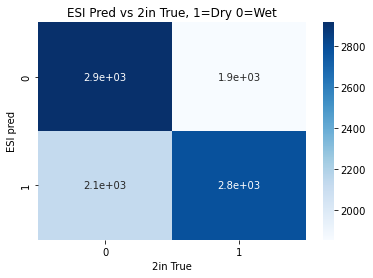

In [34]:
#two in plot
hm = sns.heatmap(TwoDataForPlot, annot=True, cmap="Blues") #two in confusion overall
hm.set(xlabel='2in True', ylabel='ESI pred', title='ESI Pred vs 2in True, 1=Dry 0=Wet')

#ESI 1 means dry and 0 means wet 

[Text(0.5, 15.0, '4in True'),
 Text(33.0, 0.5, 'ESI pred'),
 Text(0.5, 1.0, 'ESI Pred vs 4in True, 1=Dry 0=Wet')]

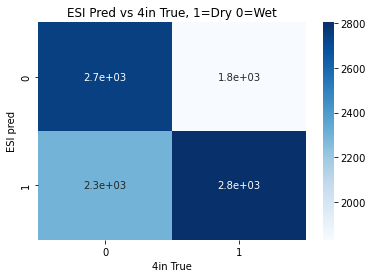

In [35]:
#four in plot
hm = sns.heatmap(FourDataForPlot, annot=True, cmap="Blues") #two in confusion overall
hm.set(xlabel='4in True', ylabel='ESI pred', title='ESI Pred vs 4in True, 1=Dry 0=Wet')

[Text(0.5, 15.0, '8in True'),
 Text(33.0, 0.5, 'ESI pred'),
 Text(0.5, 1.0, 'ESI Pred vs 8in True, 1=Dry 0=Wet')]

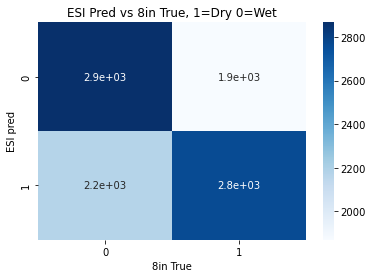

In [36]:
#Eight in plot
hm = sns.heatmap(EightDataForPlot, annot=True, cmap="Blues") #two in confusion overall
hm.set(xlabel='8in True', ylabel='ESI pred', title='ESI Pred vs 8in True, 1=Dry 0=Wet')

[Text(0.5, 15.0, '20in True'),
 Text(33.0, 0.5, 'ESI pred'),
 Text(0.5, 1.0, 'ESI Pred vs 20in True, 1=Dry 0=Wet')]

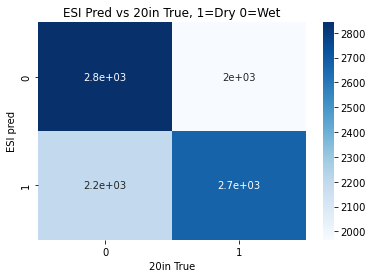

In [37]:
#Twenty in Plot
hm = sns.heatmap(TwentyDataForPlot, annot=True, cmap="Blues") #two in confusion overall
hm.set(xlabel='20in True', ylabel='ESI pred', title='ESI Pred vs 20in True, 1=Dry 0=Wet')

[Text(0.5, 15.0, '40in True'),
 Text(33.0, 0.5, 'ESI pred'),
 Text(0.5, 1.0, 'ESI Pred vs 40in True, 1=Dry 0=Wet')]

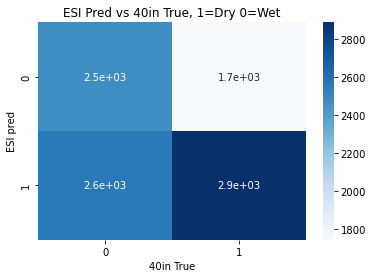

In [38]:
#Forty in Plot
hm = sns.heatmap(FortyDataForPlot, annot=True, cmap="Blues") #two in confusion overall
hm.set(xlabel='40in True', ylabel='ESI pred', title='ESI Pred vs 40in True, 1=Dry 0=Wet')

In [39]:
TwoTn, TwoFp, TwoFn, TwoTp = confusion_matrix(x_true2in, y_pred).ravel()
FourTn, FourFp, FourFn, FourTp = confusion_matrix(x_true4in, y_pred).ravel()
EightTn, EightFp, EightFn, EightTp = confusion_matrix(x_true8in, y_pred).ravel()
TwentyTn, TwentyFp, TwentyFn, TwentyTp = confusion_matrix(x_true20in, y_pred).ravel()
FortyTn, FortyFp, FortyFn, FortyTp = confusion_matrix(x_true40in, y_pred).ravel()

In [40]:
TwoAccuracy = (TwoTn + TwoTp) / (TwoFn + TwoFp + TwoTn + TwoTp)
FourAccuracy = (FourTn + FourTp) / (FourFn + FourFp + FourTn + FourTp)
EightAccuracy = (EightTn + EightTp) / (EightFn + EightFp + EightTn + EightTp)
TwentyAccuracy = (TwentyTn + TwentyTp) / (TwentyFn + TwentyFp + TwentyTn + TwentyTp)
FortyAccuracy = (FortyTn + FortyTp) / (FortyFn + FortyFp + FortyTn + FortyTp)

In [41]:
print(TwoAccuracy, FourAccuracy, EightAccuracy, TwentyAccuracy, FortyAccuracy)

0.5887947074633036 0.573599338432913 0.5820756667355799 0.5695679139962787 0.5544759148232375


In [42]:
accuracies = [TwoAccuracy, FourAccuracy, EightAccuracy, TwentyAccuracy, FortyAccuracy]
labels = ['2in', '4in', '8in','20in','40in']

In [43]:
AccuracyDF = pd.DataFrame()
AccuracyDF['Accuracy'] = accuracies
AccuracyDF['Index'] = labels

In [44]:
AccuracyDF.set_index('Index', inplace=True)

[Text(0, 0, 'Accuracy:\n0.59'),
 Text(0, 0, 'Accuracy:\n0.57'),
 Text(0, 0, 'Accuracy:\n0.58'),
 Text(0, 0, 'Accuracy:\n0.57'),
 Text(0, 0, 'Accuracy:\n0.55')]

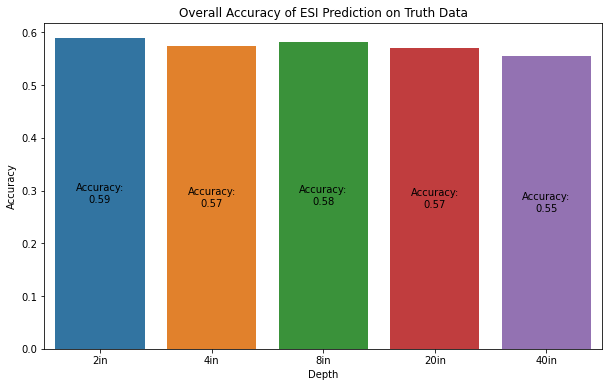

In [45]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,6))
bar=sns.barplot(data=AccuracyDF, x=AccuracyDF.index, y=AccuracyDF['Accuracy'], ax=ax)
bar.set(title='Overall Accuracy of ESI Prediction on Truth Data', xlabel='Depth')
ax.bar_label(ax.containers[-1], fmt='Accuracy:\n%.2f', label_type='center')

In [46]:
count = 0
number = []
TwoListAccuracy = []
FourListAccuracy = []
EightListAccuracy = []
TwentyListAccuracy = []
FortyListAccuracy = []
while count != len(stddevList)-1:
    lower = stddevList[count+1]
    upper = stddevList[count]
    frame = finalFrame[(finalFrame['ESI']>=upper)&(finalFrame['ESI']<=lower)]
    y_pred = frame['ESI_sign']
    x_true2in = frame['2inANOM_sign']
    x_true4in = frame['4inANOM_sign']
    x_true8in = frame['8inANOM_sign']
    x_true20in = frame['20inANOM_sign']
    x_true40in = frame['40inANOM_sign']
    TwoTn, TwoFp, TwoFn, TwoTp = confusion_matrix(x_true2in, y_pred).ravel()
    FourTn, FourFp, FourFn, FourTp = confusion_matrix(x_true4in, y_pred).ravel()
    EightTn, EightFp, EightFn, EightTp = confusion_matrix(x_true8in, y_pred).ravel()
    TwentyTn, TwentyFp, TwentyFn, TwentyTp = confusion_matrix(x_true20in, y_pred).ravel()
    FortyTn, FortyFp, FortyFn, FortyTp = confusion_matrix(x_true40in, y_pred).ravel()
    TwoAccuracy = (TwoTn + TwoTp) / (TwoFn + TwoFp + TwoTn + TwoTp)
    FourAccuracy = (FourTn + FourTp) / (FourFn + FourFp + FourTn + FourTp)
    EightAccuracy = (EightTn + EightTp) / (EightFn + EightFp + EightTn + EightTp)
    TwentyAccuracy = (TwentyTn + TwentyTp) / (TwentyFn + TwentyFp + TwentyTn + TwentyTp)
    FortyAccuracy = (FortyTn + FortyTp) / (FortyFn + FortyFp + FortyTn + FortyTp)
    TwoListAccuracy.append(TwoAccuracy)
    FourListAccuracy.append(FourAccuracy)
    EightListAccuracy.append(EightAccuracy)
    TwentyListAccuracy.append(TwentyAccuracy)
    FortyListAccuracy.append(FortyAccuracy)
    count+=1

In [47]:
BracketAccuracy = pd.DataFrame()
BracketAccuracy['Brackets'] = ['-3,-2.5', '-2.5,-2.0', '-2.0,-1.5', '-1.5,-1.0', '-1.0,-0.5', '-0.5,0.0', '0.0,0.5','0.5,1.0','1.0,1.5','1.5,2.0', '2.0,2.5','2.5,3.0']
BracketAccuracy['SMS-2.0in Accuracy'] = TwoListAccuracy
BracketAccuracy['SMS-4.0in Accuracy'] = FourListAccuracy
BracketAccuracy['SMS-8.0in Accuracy'] = EightListAccuracy
BracketAccuracy['SMS-20.0in Accuracy'] = TwentyListAccuracy
BracketAccuracy['SMS-40.0in Accuracy'] = FortyListAccuracy

[Text(0, 0.5, 'Accuracy'),
 Text(0.5, 0, 'Bins'),
 Text(0.5, 1.0, 'Overall Accuracy of ESI Prediction by Depth')]

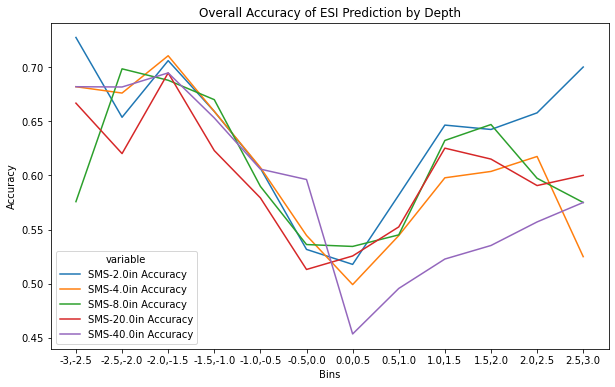

In [48]:
fig, ax = plt.subplots(figsize=(10,6))
plot = sns.lineplot(x='Brackets', y='value', hue='variable', data=pd.melt(BracketAccuracy, ['Brackets']), ax=ax)
plot.set(ylabel='Accuracy', xlabel='Bins', title='Overall Accuracy of ESI Prediction by Depth')

In [49]:
def getDrySoilAnomSign(x,augment=None):
    if augment==None:
        if x <= upper:
            return 1 
        else:
            return 0
    else:
        new = upper + augment
        if x<=new:
            return 1
        else:
            return 0

In [50]:
count = 0
number = []
TwoListAccuracy = []
FourListAccuracy = []
EightListAccuracy = []
TwentyListAccuracy = []
FortyListAccuracy = []
number = []
while count != 6:
    upper = stddevList[count+1]
    lower = stddevList[count]
    frame = finalFrame[(finalFrame['ESI']>=lower)&(finalFrame['ESI']<=upper)]
    frame['2inBelowUpper'] = frame['2inANOM'].apply(getDrySoilAnomSign) #we want to know if soil anom is actually in ESI range for true predictions
    frame['4inBelowUpper'] = frame['4inANOM'].apply(getDrySoilAnomSign)
    frame['8inBelowUpper'] = frame['8inANOM'].apply(getDrySoilAnomSign)
    frame['20inBelowUpper'] = frame['20inANOM'].apply(getDrySoilAnomSign)
    frame['40inBelowUpper'] = frame['40inANOM'].apply(getDrySoilAnomSign)
    n = len(frame)
    y_pred = frame['ESI_sign']
    x_true2in = frame['2inBelowUpper']
    x_true4in = frame['4inBelowUpper']
    x_true8in = frame['8inBelowUpper']
    x_true20in = frame['20inBelowUpper']
    x_true40in = frame['40inBelowUpper']
    TwoTn, TwoFp, TwoFn, TwoTp = confusion_matrix(x_true2in, y_pred).ravel()
    FourTn, FourFp, FourFn, FourTp = confusion_matrix(x_true4in, y_pred).ravel()
    EightTn, EightFp, EightFn, EightTp = confusion_matrix(x_true8in, y_pred).ravel()
    TwentyTn, TwentyFp, TwentyFn, TwentyTp = confusion_matrix(x_true20in, y_pred).ravel()
    FortyTn, FortyFp, FortyFn, FortyTp = confusion_matrix(x_true40in, y_pred).ravel()
    TwoAccuracy = (TwoTn + TwoTp) / (TwoFn + TwoFp + TwoTn + TwoTp)
    FourAccuracy = (FourTn + FourTp) / (FourFn + FourFp + FourTn + FourTp)
    EightAccuracy = (EightTn + EightTp) / (EightFn + EightFp + EightTn + EightTp)
    TwentyAccuracy = (TwentyTn + TwentyTp) / (TwentyFn + TwentyFp + TwentyTn + TwentyTp)
    FortyAccuracy = (FortyTn + FortyTp) / (FortyFn + FortyFp + FortyTn + FortyTp)
    TwoListAccuracy.append(TwoAccuracy)
    FourListAccuracy.append(FourAccuracy)
    EightListAccuracy.append(EightAccuracy)
    TwentyListAccuracy.append(TwentyAccuracy)
    FortyListAccuracy.append(FortyAccuracy)
    number.append(n)
    count+=1

In [51]:
BracketAccuracy = pd.DataFrame()
BracketAccuracy['Below Bin'] = ['-2.5', '-2.0', '-1.5', '-1.0', '-0.5', '0.0']
BracketAccuracy['SMS-2.0in Accuracy'] = TwoListAccuracy
BracketAccuracy['SMS-4.0in Accuracy'] = FourListAccuracy
BracketAccuracy['SMS-8.0in Accuracy'] = EightListAccuracy
BracketAccuracy['SMS-20.0in Accuracy'] = TwentyListAccuracy
BracketAccuracy['SMS-40.0in Accuracy'] = FortyListAccuracy

[Text(0, 0.5, 'SM Prediction Accuracy'),
 Text(0.5, 0, 'ESI Bin'),
 Text(0.5, 1.0, 'Accuracy of ESI Prediction for SM Anomaly Below Bin')]

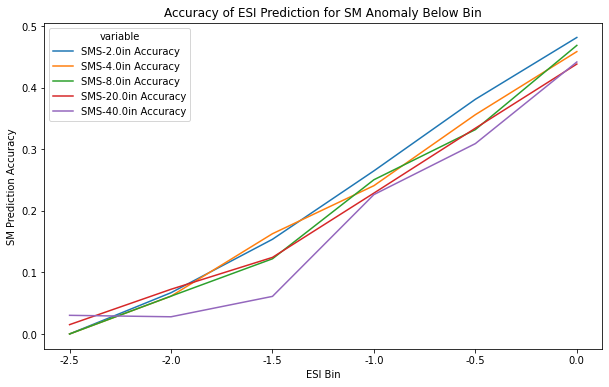

In [52]:
fig, ax = plt.subplots(figsize=(10,6))
plot = sns.lineplot(x='Below Bin', y='value', hue='variable', data=pd.melt(BracketAccuracy, ['Below Bin']), ax=ax)
plot.set(ylabel='SM Prediction Accuracy', xlabel='ESI Bin', title='Accuracy of ESI Prediction for SM Anomaly Below Bin')

In [53]:
count = 0
shiftBracket=2
number = []
TwoListAccuracy = []
FourListAccuracy = []
EightListAccuracy = []
TwentyListAccuracy = []
FortyListAccuracy = []
number = []
while count != 6:
    upper = stddevList[count+1]
    lower = stddevList[count]
    frame = finalFrame[(finalFrame['ESI']>=lower)&(finalFrame['ESI']<=upper)]
    frame['2inBelowUpper'] = frame['2inANOM'].apply(getDrySoilAnomSign, augment=shiftBracket) #we want to know if soil anom is within 2 points of ESI to the right
    frame['4inBelowUpper'] = frame['4inANOM'].apply(getDrySoilAnomSign, augment=shiftBracket)
    frame['8inBelowUpper'] = frame['8inANOM'].apply(getDrySoilAnomSign, augment=shiftBracket)
    frame['20inBelowUpper'] = frame['20inANOM'].apply(getDrySoilAnomSign, augment=shiftBracket)
    frame['40inBelowUpper'] = frame['40inANOM'].apply(getDrySoilAnomSign, augment=shiftBracket)
    n = len(frame)
    y_pred = frame['ESI_sign']
    x_true2in = frame['2inBelowUpper']
    x_true4in = frame['4inBelowUpper']
    x_true8in = frame['8inBelowUpper']
    x_true20in = frame['20inBelowUpper']
    x_true40in = frame['40inBelowUpper']
    TwoTn, TwoFp, TwoFn, TwoTp = confusion_matrix(x_true2in, y_pred).ravel()
    FourTn, FourFp, FourFn, FourTp = confusion_matrix(x_true4in, y_pred).ravel()
    EightTn, EightFp, EightFn, EightTp = confusion_matrix(x_true8in, y_pred).ravel()
    TwentyTn, TwentyFp, TwentyFn, TwentyTp = confusion_matrix(x_true20in, y_pred).ravel()
    FortyTn, FortyFp, FortyFn, FortyTp = confusion_matrix(x_true40in, y_pred).ravel()
    TwoAccuracy = (TwoTn + TwoTp) / (TwoFn + TwoFp + TwoTn + TwoTp)
    FourAccuracy = (FourTn + FourTp) / (FourFn + FourFp + FourTn + FourTp)
    EightAccuracy = (EightTn + EightTp) / (EightFn + EightFp + EightTn + EightTp)
    TwentyAccuracy = (TwentyTn + TwentyTp) / (TwentyFn + TwentyFp + TwentyTn + TwentyTp)
    FortyAccuracy = (FortyTn + FortyTp) / (FortyFn + FortyFp + FortyTn + FortyTp)
    TwoListAccuracy.append(TwoAccuracy)
    FourListAccuracy.append(FourAccuracy)
    EightListAccuracy.append(EightAccuracy)
    TwentyListAccuracy.append(TwentyAccuracy)
    FortyListAccuracy.append(FortyAccuracy)
    number.append(n)
    count+=1
BracketAccuracy = pd.DataFrame()
BracketAccuracy['Below Bin'] = ['-2.5'+'+'+str(shiftBracket), '-2.0'+'+'+str(shiftBracket), '-1.5'+'+'+str(shiftBracket), '-1.0'+'+'+str(shiftBracket), '-0.5'+'+'+str(shiftBracket), '-0.0'+'+'+str(shiftBracket)]
BracketAccuracy['SMS-2.0in'] = TwoListAccuracy
BracketAccuracy['SMS-4.0in'] = FourListAccuracy
BracketAccuracy['SMS-8.0in'] = EightListAccuracy
BracketAccuracy['SMS-20.0in'] = TwentyListAccuracy
BracketAccuracy['SMS-40.0in'] = FortyListAccuracy

[Text(0, 0.5, 'SM Prediction Accuracy'),
 Text(0.5, 0, 'ESI + Augment Bin'),
 Text(0.5, 1.0, 'Accuracy of ESI Prediction for SM Anomaly with Augmented Below Bin')]

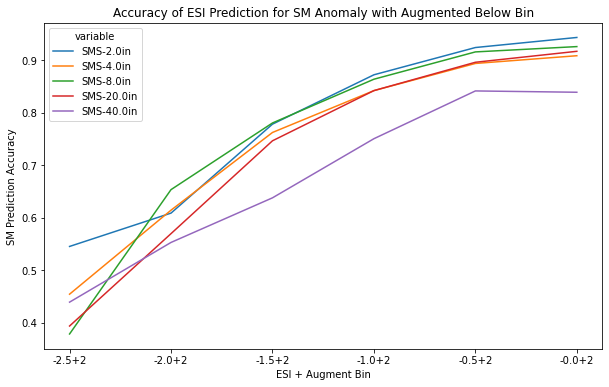

In [54]:
fig, ax = plt.subplots(figsize=(10,6))
plot = sns.lineplot(x='Below Bin', y='value', hue='variable', data=pd.melt(BracketAccuracy, ['Below Bin']), ax=ax)
plot.set(ylabel='SM Prediction Accuracy', xlabel='ESI + Augment Bin', title='Accuracy of ESI Prediction for SM Anomaly with Augmented Below Bin')

In [55]:
number = []
TwoListAccuracy = []
FourListAccuracy = []
EightListAccuracy = []
TwentyListAccuracy = []
FortyListAccuracy = []
month = [] 
for m in finalFrame.index.month.unique():
    month.append(m)
    monthFrame = finalFrame[finalFrame.index.month==m]
    y_pred = monthFrame['ESI_sign']
    x_true2in = monthFrame['2inANOM_sign']
    x_true4in = monthFrame['4inANOM_sign']
    x_true8in = monthFrame['8inANOM_sign']
    x_true20in = monthFrame['20inANOM_sign']
    x_true40in = monthFrame['40inANOM_sign']
    TwoTn, TwoFp, TwoFn, TwoTp = confusion_matrix(x_true2in, y_pred).ravel()
    FourTn, FourFp, FourFn, FourTp = confusion_matrix(x_true4in, y_pred).ravel()
    EightTn, EightFp, EightFn, EightTp = confusion_matrix(x_true8in, y_pred).ravel()
    TwentyTn, TwentyFp, TwentyFn, TwentyTp = confusion_matrix(x_true20in, y_pred).ravel()
    FortyTn, FortyFp, FortyFn, FortyTp = confusion_matrix(x_true40in, y_pred).ravel()
    TwoAccuracy = (TwoTn + TwoTp) / (TwoFn + TwoFp + TwoTn + TwoTp)
    FourAccuracy = (FourTn + FourTp) / (FourFn + FourFp + FourTn + FourTp)
    EightAccuracy = (EightTn + EightTp) / (EightFn + EightFp + EightTn + EightTp)
    TwentyAccuracy = (TwentyTn + TwentyTp) / (TwentyFn + TwentyFp + TwentyTn + TwentyTp)
    FortyAccuracy = (FortyTn + FortyTp) / (FortyFn + FortyFp + FortyTn + FortyTp)
    TwoListAccuracy.append(TwoAccuracy)
    FourListAccuracy.append(FourAccuracy)
    EightListAccuracy.append(EightAccuracy)
    TwentyListAccuracy.append(TwentyAccuracy)
    FortyListAccuracy.append(FortyAccuracy)

In [56]:
BracketAccuracy = pd.DataFrame()
BracketAccuracy['SMS-2.0in'] = TwoListAccuracy
BracketAccuracy['SMS-4.0in'] = FourListAccuracy
BracketAccuracy['SMS-8.0in'] = EightListAccuracy
BracketAccuracy['SMS-20.0in'] = TwentyListAccuracy
BracketAccuracy['SMS-40.0in'] = FortyListAccuracy
BracketAccuracy['Month'] = month

In [57]:
BracketAccuracy.set_index('Month', inplace=True)

In [58]:
BracketAccuracy.sort_index(inplace=True)

Text(0, 0.5, 'Accuracy')

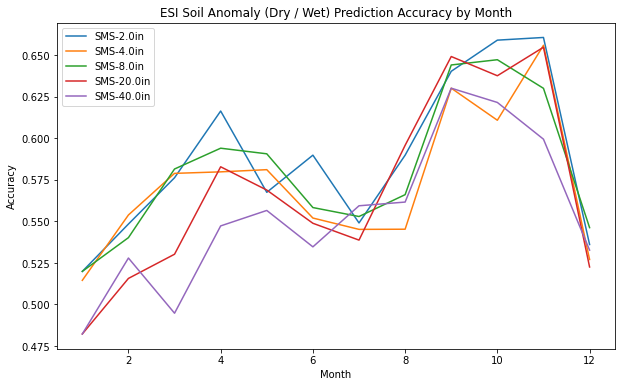

In [59]:
fig, ax = plt.subplots(figsize=(10,6))
BracketAccuracy.plot(ax=ax)
ax.set_title('ESI Soil Anomaly (Dry / Wet) Prediction Accuracy by Month')
ax.set_xlabel('Month')
ax.set_ylabel('Accuracy')

In [60]:
df = finalFrame[['station', 'week_x', 'ESI', '2inANOM', '4inANOM', '8inANOM', '20inANOM','40inANOM']]

In [61]:
df = df[df['station']=='2078:AL:SCAN'][['ESI', '2inANOM', '4inANOM','8inANOM','20inANOM','40inANOM']]

Text(0.5, 1.0, '2078:AL:SCAN 2015 Drought Year Anomaly Cumulative Sum')

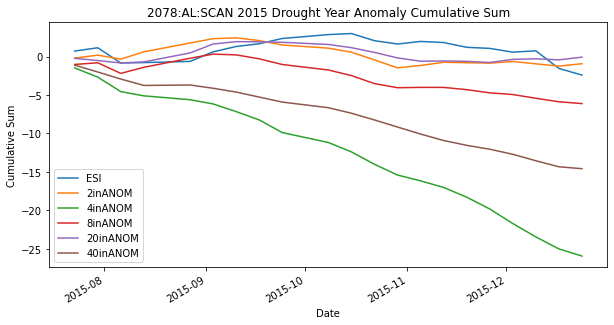

In [62]:
fig, ax = plt.subplots(figsize=(10,5))
data = df[df.index.year==2015].cumsum()
data.plot(ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Sum')
ax.set_title('2078:AL:SCAN 2015 Drought Year Anomaly Cumulative Sum')

Text(0.5, 1.0, '2078:AL:SCAN 2012 Drought Year Anomaly Cumulative Sum')

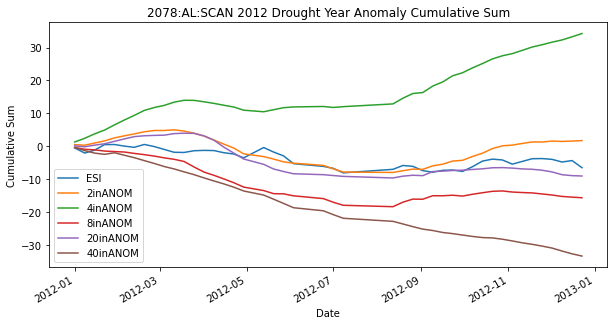

In [63]:
fig, ax = plt.subplots(figsize=(10,5))
data = df[df.index.year==2012].cumsum()
data.plot(ax=ax)

ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Sum')
ax.set_title('2078:AL:SCAN 2012 Drought Year Anomaly Cumulative Sum')

In [64]:
data

,ESI,2inANOM,4inANOM,8inANOM,20inANOM,40inANOM
Date,,,,,,
2012-01-01,-0.497,0.479086,1.291479,-0.361265,0.113678,-0.365860
2012-01-08,-2.069,0.324622,2.404458,-0.926850,-0.163439,-1.319315
2012-01-15,-1.187,0.974855,3.758035,-1.097126,0.343493,-2.081464
2012-01-22,0.499,1.627853,4.907534,-1.456649,0.749241,-2.450177
2012-01-29,0.530,2.533749,6.489503,-1.613195,1.497738,-1.986617
2012-02-05,0.038,3.171759,7.980794,-1.757136,2.232766,-2.734675
2012-02-12,-0.321,3.758190,9.394818,-2.180724,2.928754,-3.484988
2012-02-19,0.543,4.392617,10.881026,-2.546783,3.186712,-4.365799
2012-02-26,-0.092,4.792058,11.757164,-2.982456,3.300587,-5.227931


In [65]:
TwoListAccuracy = []
FourListAccuracy = []
EightListAccuracy = []
TwentyListAccuracy = []
FortyListAccuracy = []
year = [] 
station = []
number_observations = []

for i in finalFrame.station.unique():
    stationFrame = finalFrame[finalFrame['station']==i]
    for y in stationFrame.index.year.unique():
        yearFrame = stationFrame[stationFrame.index.year == y]
        if len(yearFrame)<4:
            pass
        else:
            number_observations.append(len(yearFrame))
            station.append(i)
            year.append(y)
            y_pred = yearFrame['ESI_sign']
            x_true2in = yearFrame['2inANOM_sign']
            x_true4in = yearFrame['4inANOM_sign']
            x_true8in = yearFrame['8inANOM_sign']
            x_true20in = yearFrame['20inANOM_sign']
            x_true40in = yearFrame['40inANOM_sign']
            TwoTn, TwoFp, TwoFn, TwoTp = confusion_matrix(x_true2in, y_pred).ravel()
            FourTn, FourFp, FourFn, FourTp = confusion_matrix(x_true4in, y_pred).ravel()
            EightTn, EightFp, EightFn, EightTp = confusion_matrix(x_true8in, y_pred).ravel()
            TwentyTn, TwentyFp, TwentyFn, TwentyTp = confusion_matrix(x_true20in, y_pred).ravel()
            FortyTn, FortyFp, FortyFn, FortyTp = confusion_matrix(x_true40in, y_pred).ravel()
            TwoAccuracy = (TwoTn + TwoTp) / (TwoFn + TwoFp + TwoTn + TwoTp)
            FourAccuracy = (FourTn + FourTp) / (FourFn + FourFp + FourTn + FourTp)
            EightAccuracy = (EightTn + EightTp) / (EightFn + EightFp + EightTn + EightTp)
            TwentyAccuracy = (TwentyTn + TwentyTp) / (TwentyFn + TwentyFp + TwentyTn + TwentyTp)
            FortyAccuracy = (FortyTn + FortyTp) / (FortyFn + FortyFp + FortyTn + FortyTp)
            TwoListAccuracy.append(TwoAccuracy)
            FourListAccuracy.append(FourAccuracy)
            EightListAccuracy.append(EightAccuracy)
            TwentyListAccuracy.append(TwentyAccuracy)
            FortyListAccuracy.append(FortyAccuracy)
stationAccuracy = pd.DataFrame()
stationAccuracy['SMS-2.0in'] = TwoListAccuracy
stationAccuracy['SMS-4.0in'] = FourListAccuracy
stationAccuracy['SMS-8.0in'] = EightListAccuracy
stationAccuracy['SMS-20.0in'] = TwentyListAccuracy
stationAccuracy['SMS-40.0in'] = FortyListAccuracy
stationAccuracy['year'] = year
stationAccuracy['station']=station

[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:> <AxesSubplot:>]


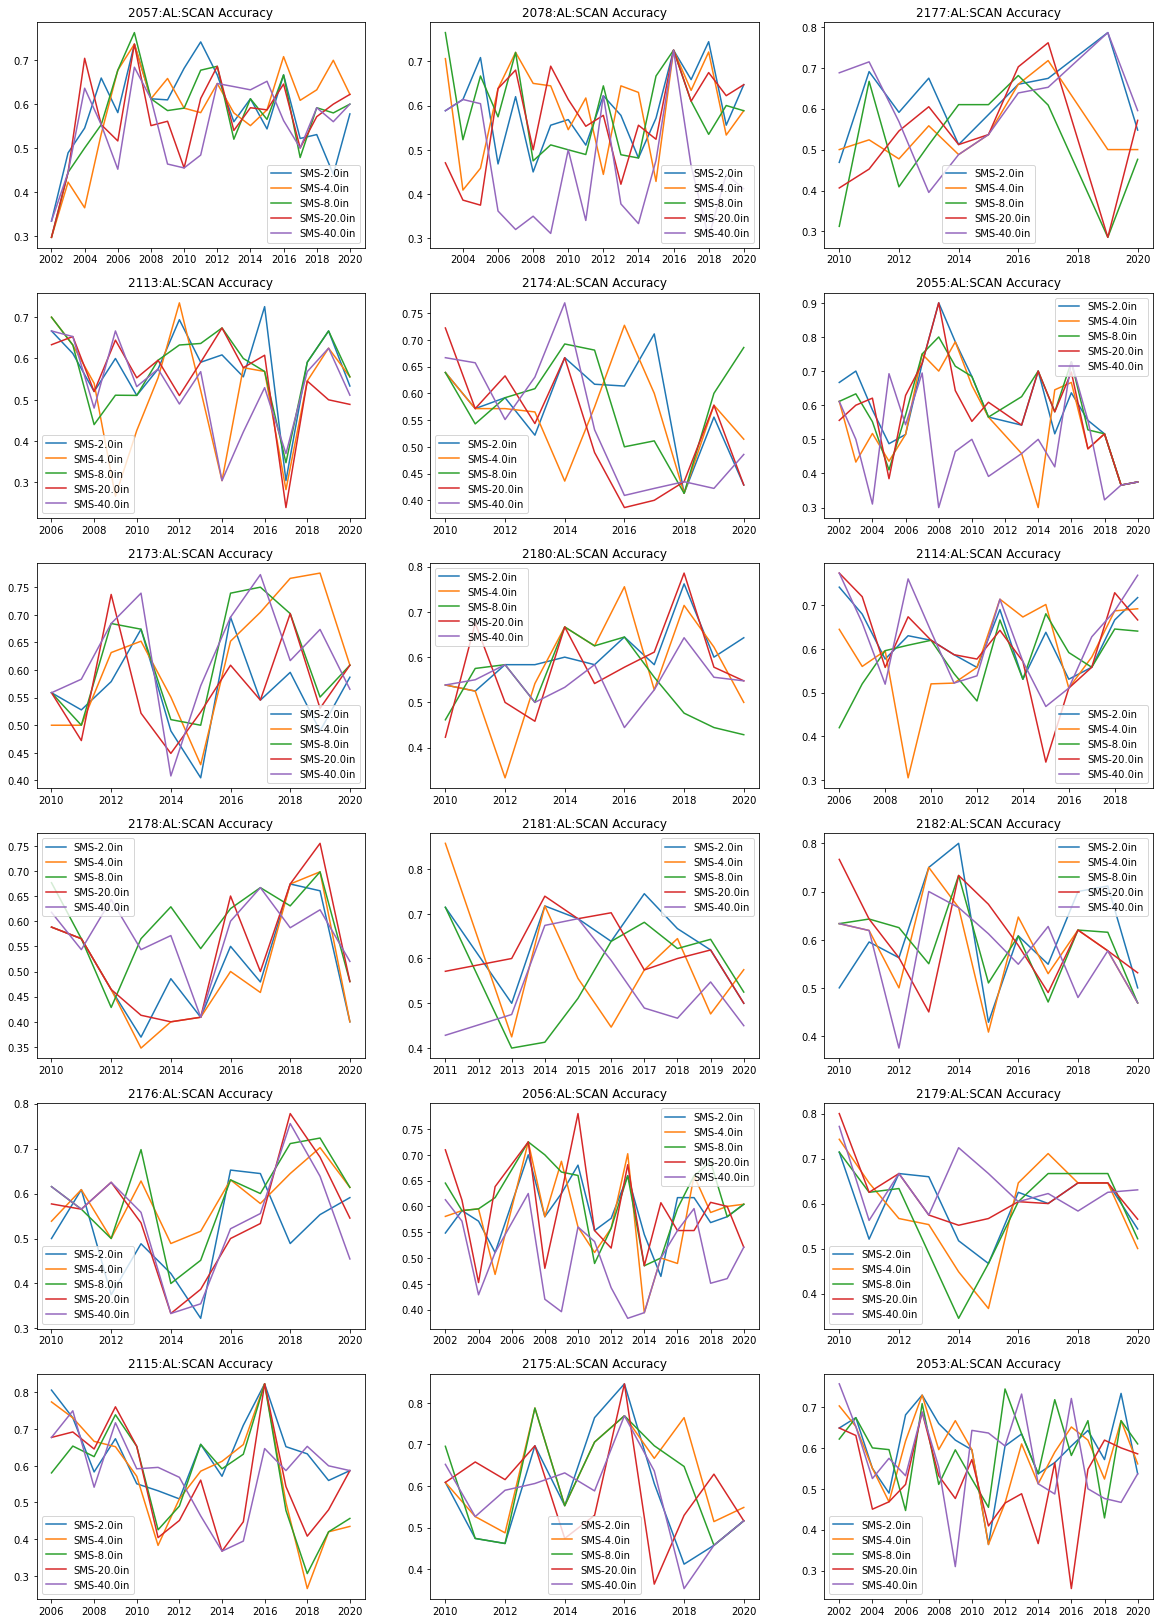

In [66]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots(nrows=6, ncols=3, figsize=(20,29))
axes = ax.flatten()
print(axes)
count = 0
for station in stationAccuracy.station.unique():
    stationFrame=stationAccuracy[stationAccuracy['station']==station]
    stationFrame.set_index('year', inplace=True)
    axes[count].plot(stationFrame['SMS-2.0in'], label='SMS-2.0in')
    axes[count].plot(stationFrame['SMS-4.0in'], label='SMS-4.0in')
    axes[count].plot(stationFrame['SMS-8.0in'], label='SMS-8.0in')
    axes[count].plot(stationFrame['SMS-20.0in'], label='SMS-20.0in')
    axes[count].plot(stationFrame['SMS-40.0in'], label='SMS-40.0in')
    axes[count].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    axes[count].legend()
    axes[count].set_title(station + " Accuracy")
    count+=1

In [67]:
#now we will do landcover analysis with accuracy 
from datasets import LANDCOVER_READ

In [68]:
#now we will interpolate landcover for each station, and return a new frame
dic = {}
for station in LANDCOVER_READ['station'].unique():
    stationFrame=LANDCOVER_READ[LANDCOVER_READ['station']==station]
    stationFrame.set_index('year', inplace=True)
    new_index = pd.Index(np.arange(stationFrame.index.min(), stationFrame.index.max(), 1), name='year')
    stationFrame = stationFrame.reindex(new_index)
    stationFrame['station']=station
    stationFrame = stationFrame.interpolate()
    stationFrame.reset_index(inplace=True)
    dic[station]=stationFrame
df = pd.concat(dic, ignore_index=True)

In [69]:
merged = stationAccuracy.merge(df, on=['station', 'year'])
merged

,SMS-2.0in,SMS-4.0in,SMS-8.0in,SMS-20.0in,SMS-40.0in,year,station,Agland percent,Water percent,Shrub percent,Forest percent,Barren percent,Herbaceous percent,Wetland percent,Developed percent
0,0.333333,0.296296,0.296296,0.296296,0.333333,2002,2057:AL:SCAN,0.253886,0.000543,0.009142,0.415037,0.000177,0.003107,0.002185,0.315923
1,0.488889,0.422222,0.444444,0.444444,0.444444,2003,2057:AL:SCAN,0.250650,0.000520,0.009957,0.414871,0.000177,0.003697,0.002209,0.317919
2,0.545455,0.363636,0.500000,0.704545,0.636364,2004,2057:AL:SCAN,0.247413,0.000496,0.010773,0.414706,0.000177,0.004288,0.002232,0.319915
3,0.659574,0.531915,0.553191,0.553191,0.553191,2005,2057:AL:SCAN,0.236729,0.000532,0.010737,0.407052,0.000177,0.005422,0.002179,0.337172
4,0.580645,0.677419,0.677419,0.516129,0.451613,2006,2057:AL:SCAN,0.226045,0.000567,0.010702,0.399398,0.000177,0.006556,0.002126,0.354429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.536585,0.512195,0.536585,0.365854,0.512195,2014,2053:AL:SCAN,0.781269,0.001006,0.004663,0.039649,0.000130,0.004545,0.032453,0.136285
204,0.564103,0.589744,0.717949,0.564103,0.487179,2015,2053:AL:SCAN,0.779127,0.000982,0.004071,0.040134,0.000189,0.004616,0.032453,0.138427
205,0.604651,0.651163,0.581395,0.255814,0.720930,2016,2053:AL:SCAN,0.776985,0.000959,0.003480,0.040619,0.000249,0.004687,0.032453,0.140570
206,0.642857,0.619048,0.666667,0.547619,0.500000,2017,2053:AL:SCAN,0.776985,0.000959,0.003480,0.040619,0.000249,0.004687,0.032453,0.140570


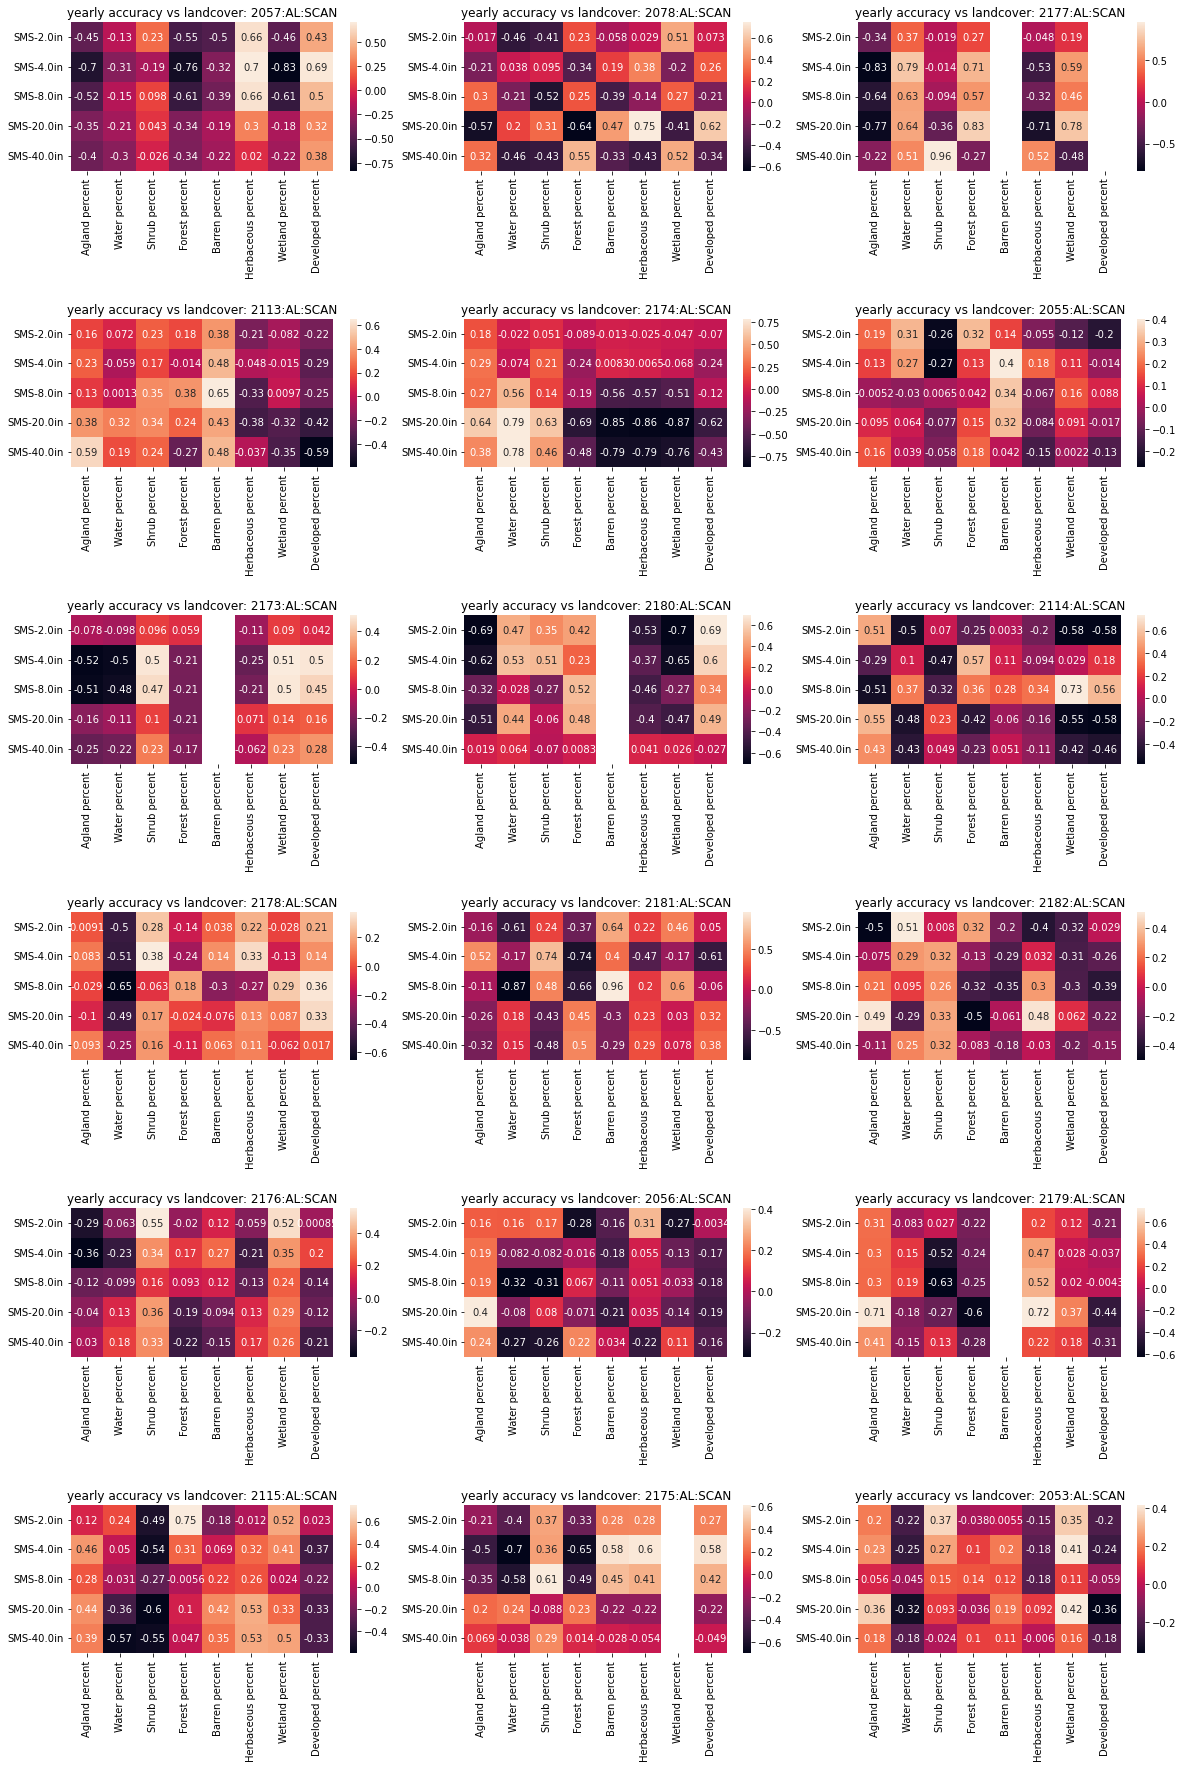

In [70]:
import seaborn as sns
fig, ax = plt.subplots(6, 3, figsize=(20, 30))
axes = ax.flatten()
count = 0 
for station in merged['station'].unique():
    stationFrame = merged[merged['station']==station]
    corr = stationFrame.corr()
    corr = corr[['Agland percent', 'Water percent', 'Shrub percent',
       'Forest percent', 'Barren percent', 'Herbaceous percent',
       'Wetland percent', 'Developed percent']]
    
    g = sns.heatmap(corr.head(5), annot=True, ax=axes[count])
    axes[count].set_title("yearly accuracy vs landcover: " + station)
    count+=1 
fig.subplots_adjust(hspace=1.0)

In [71]:
depths = ['SMS-2.0in', 'SMS-4.0in', 'SMS-8.0in', 'SMS-20.0in', 'SMS-40.0in']
types = ['Agland percent', 'Shrub percent', 'Water percent', 'Developed percent', 'Forest percent', 'Wetland percent', 'Herbaceous percent', 'Barren percent']

from scipy import stats
import numpy as np

def plotLandCoverCorrbyDepth(landtype, depth):
    """A function to return a plot of landcover percents and effect on accuracy of ALEXI prediction"""
    fig, ax = plt.subplots()
    stations = []
    landcoveravg = []
    correlation = []

    for station in merged['station'].unique():
        stationFrame = merged[merged['station']==station]
        cor = stationFrame.corr()
        cor = cor[types].head(5)
        corr = cor[cor.index==depth][landtype].item()
        landavg = stationFrame[landtype].mean()
        landcoveravg.append(landavg)
        stations.append(station)
        correlation.append(corr)
        ax.scatter(landavg, corr, label=station)
    
    x = np.array(landcoveravg)
    y = np.array(correlation)
    mask = ~np.isnan(x) & ~np.isnan(y)
    slope, intercept, r, p, se = stats.linregress(x[mask], y[mask])
    r2 = r**2
    ax.set_title("{} accuracy vs {} correlation".format(depth, landtype))
    textstr = "r2: {:.2f}\n p: {:.2f}".format(r2, p)
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax.text(0.75, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
    ax.set_xlabel(landtype + " average by station")
    ax.set_ylabel("accuracy vs landtype correlation")
    return ax

NameError: name 'axs' is not defined

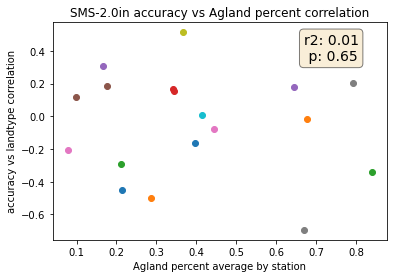

In [72]:
count = 0
for i in range(len(types)):
    for j in range(len(depths)):
        axs[count] = plotLandCoverCorrbyDepth(types[i], depths[j])
        count+=1
fig.axes.append(axs)

In [ ]:
fig, ax = plt.subplots(6, 3, figsize=(20,30))
axs = ax.flatten()
count = 0

for i in LANDCOVER_READ.station.unique():
    stationFrame = LANDCOVER_READ[LANDCOVER_READ['station']==i]
    stationFrame.set_index('year', inplace=True)
    stationFrame = stationFrame.sort_index()
    axs[count].plot(stationFrame['Agland percent'], label='Agland')
    axs[count].plot(stationFrame['Developed percent'], label='Developed')
    axs[count].plot(stationFrame['Shrub percent'], label='Shrub')
    axs[count].plot(stationFrame['Forest percent'], label='Forest')
    axs[count].set_title(i + " Landcover")
    count+=1
    
fig.legend = axs[1].legend()
fig.legend

In [ ]:
#do not correlate, now just test accuracy vs landtype
def plotLandCoverAccbyDepth(landtype, depth):
    """A function to return a plot of landcover percents and effect on accuracy of ALEXI prediction"""
    fig, ax = plt.subplots()
    stations = []
    landcoveravg = []
    accuracy = []

    for station in merged['station'].unique():
        stationFrame = merged[merged['station']==station]
        acc = stationFrame[depth].mean()
        landavg = stationFrame[landtype].mean()
        landcoveravg.append(landavg)
        stations.append(station)
        accuracy.append(acc)
        ax.scatter(landavg, acc, label=station)
    
    x = np.array(landcoveravg)
    y = np.array(accuracy)
    slope, intercept, r, p, se = stats.linregress(x, y)
    r2 = r**2
    ax.set_title("Average {} Yearly Accuracy vs {}".format(depth, landtype))
    textstr = "r2: {:.2f}\n p: {:.2f}".format(r2, p)
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax.text(0.75, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
    ax.set_xlabel("Mean " + landtype + " by station")
    ax.set_ylabel("Mean accuracy")
    return ax

In [ ]:
count = 0
for i in range(len(types)):
    for j in range(len(depths)):
        plotLandCoverAccbyDepth(types[i], depths[j])
        count+=1

In [ ]:
#can we do this by month?